In [192]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [193]:
data=pd.read_excel('ExternalData.xlsx');

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 88 columns):
Commodity      487 non-null object
PALLFNF        343 non-null object
PEXGALL        343 non-null object
PNFUEL         343 non-null object
PFANDB         343 non-null object
PFOOD          343 non-null object
PBEVE          487 non-null object
PINDU          343 non-null object
PAGRI          343 non-null object
PRAWM          487 non-null object
PALLMETA       343 non-null object
PMETA          343 non-null object
PPMETA         403 non-null object
PEXGMETA       343 non-null object
PFERT          487 non-null object
PNRG           343 non-null object
POILAPSP       355 non-null object
PNGAS          343 non-null object
PCOAL          367 non-null object
PALUM          487 non-null object
PBANSOP        487 non-null object
PBARL          487 non-null object
PBEEF          487 non-null object
PCOALAU        487 non-null object
PCOALSA_USD    367 non-null object
PCOCO          487 n

In [195]:
data.drop('PLMMODY', axis=1, inplace=True)

In [196]:
data.drop(data.index[[0,1,2]],inplace=True)

In [197]:
data

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,...,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE
3,1980M1,NaN,NaN,NaN,NaN,NaN,124.374,NaN,NaN,69.4661,...,NaN,806.786,NaN,150,100,261.316,NaN,NaN,NaN,NaN
4,1980M2,NaN,NaN,NaN,NaN,NaN,124.357,NaN,NaN,72.6044,...,NaN,882.315,NaN,160.714,115,258.095,NaN,NaN,NaN,NaN
5,1980M3,NaN,NaN,NaN,NaN,NaN,129.212,NaN,NaN,68.529,...,NaN,746.544,NaN,165,115,259.857,NaN,NaN,NaN,NaN
6,1980M4,NaN,NaN,NaN,NaN,NaN,124.304,NaN,NaN,67.0936,...,NaN,589.06,NaN,169.091,112.5,248.091,NaN,NaN,NaN,NaN
7,1980M5,NaN,NaN,NaN,NaN,NaN,127.143,NaN,NaN,66.9283,...,NaN,559.65,NaN,170,117.5,211.364,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2019M12,119.913,120.102,111.302,102.777,103.731,91.4935,122.086,102.306,99.1206,...,1900.59,925.227,0.497905,215.045,265.5,271.136,3.45729,19.4764,63.7379,2.92972
483,2020M1,119.555,118.936,114.121,104.104,105.361,89.2416,124.488,103.857,102.189,...,2226.65,986.652,0.431048,220.826,245,279.348,3.66816,17.1156,63.0079,2.88133
484,2020M2,111.092,109.187,111.632,100.386,101.402,88.3807,118.774,100.412,100.588,...,2524.7,961.1,0.396632,241,245,300,3.64687,17.002,59.4497,2.77909
485,2020M3,93.8739,90.0671,107.832,96.9123,97.709,87.4954,113.228,96.7826,95.9059,...,2108.91,759,0.2925,264.273,245,312,3.64287,16.3573,56.5843,2.77604


In [198]:
data.drop_duplicates(inplace=True)
data

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,...,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE
3,1980M1,NaN,NaN,NaN,NaN,NaN,124.374,NaN,NaN,69.4661,...,NaN,806.786,NaN,150,100,261.316,NaN,NaN,NaN,NaN
4,1980M2,NaN,NaN,NaN,NaN,NaN,124.357,NaN,NaN,72.6044,...,NaN,882.315,NaN,160.714,115,258.095,NaN,NaN,NaN,NaN
5,1980M3,NaN,NaN,NaN,NaN,NaN,129.212,NaN,NaN,68.529,...,NaN,746.544,NaN,165,115,259.857,NaN,NaN,NaN,NaN
6,1980M4,NaN,NaN,NaN,NaN,NaN,124.304,NaN,NaN,67.0936,...,NaN,589.06,NaN,169.091,112.5,248.091,NaN,NaN,NaN,NaN
7,1980M5,NaN,NaN,NaN,NaN,NaN,127.143,NaN,NaN,66.9283,...,NaN,559.65,NaN,170,117.5,211.364,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2019M12,119.913,120.102,111.302,102.777,103.731,91.4935,122.086,102.306,99.1206,...,1900.59,925.227,0.497905,215.045,265.5,271.136,3.45729,19.4764,63.7379,2.92972
483,2020M1,119.555,118.936,114.121,104.104,105.361,89.2416,124.488,103.857,102.189,...,2226.65,986.652,0.431048,220.826,245,279.348,3.66816,17.1156,63.0079,2.88133
484,2020M2,111.092,109.187,111.632,100.386,101.402,88.3807,118.774,100.412,100.588,...,2524.7,961.1,0.396632,241,245,300,3.64687,17.002,59.4497,2.77909
485,2020M3,93.8739,90.0671,107.832,96.9123,97.709,87.4954,113.228,96.7826,95.9059,...,2108.91,759,0.2925,264.273,245,312,3.64287,16.3573,56.5843,2.77604


## Filling in NaN values: Experimenting with different methods

In [199]:
import matplotlib.pyplot as plt

In [200]:
x= data['PALLFNF']
y= data['Commodity']

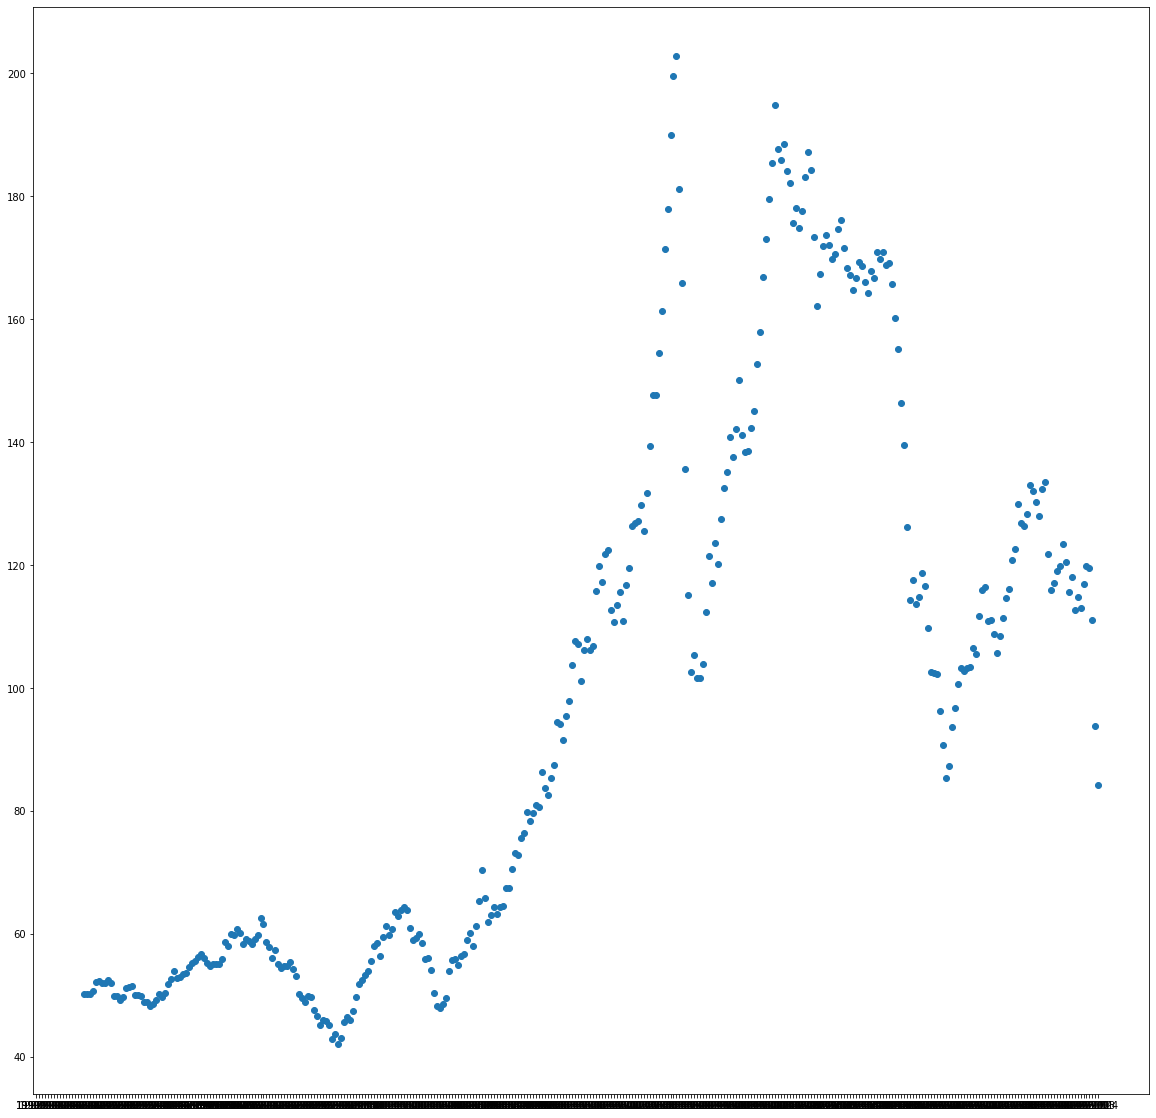

In [201]:
plt.figure(figsize=(20,20))
plt.scatter(y,x)

In [202]:
from datetime import date
time=[];
i=0;count=0;
year=1980;
for i in range(41):
    j=1;
    for j in range(1,13):
        count=count+1
        d=date(year,j,1)
        time.append(d)
        if count==484:
            break;
    if count==484:
        break;
    year=year+1;


In [203]:
len(time)

484

In [204]:
x.shape

(484,)

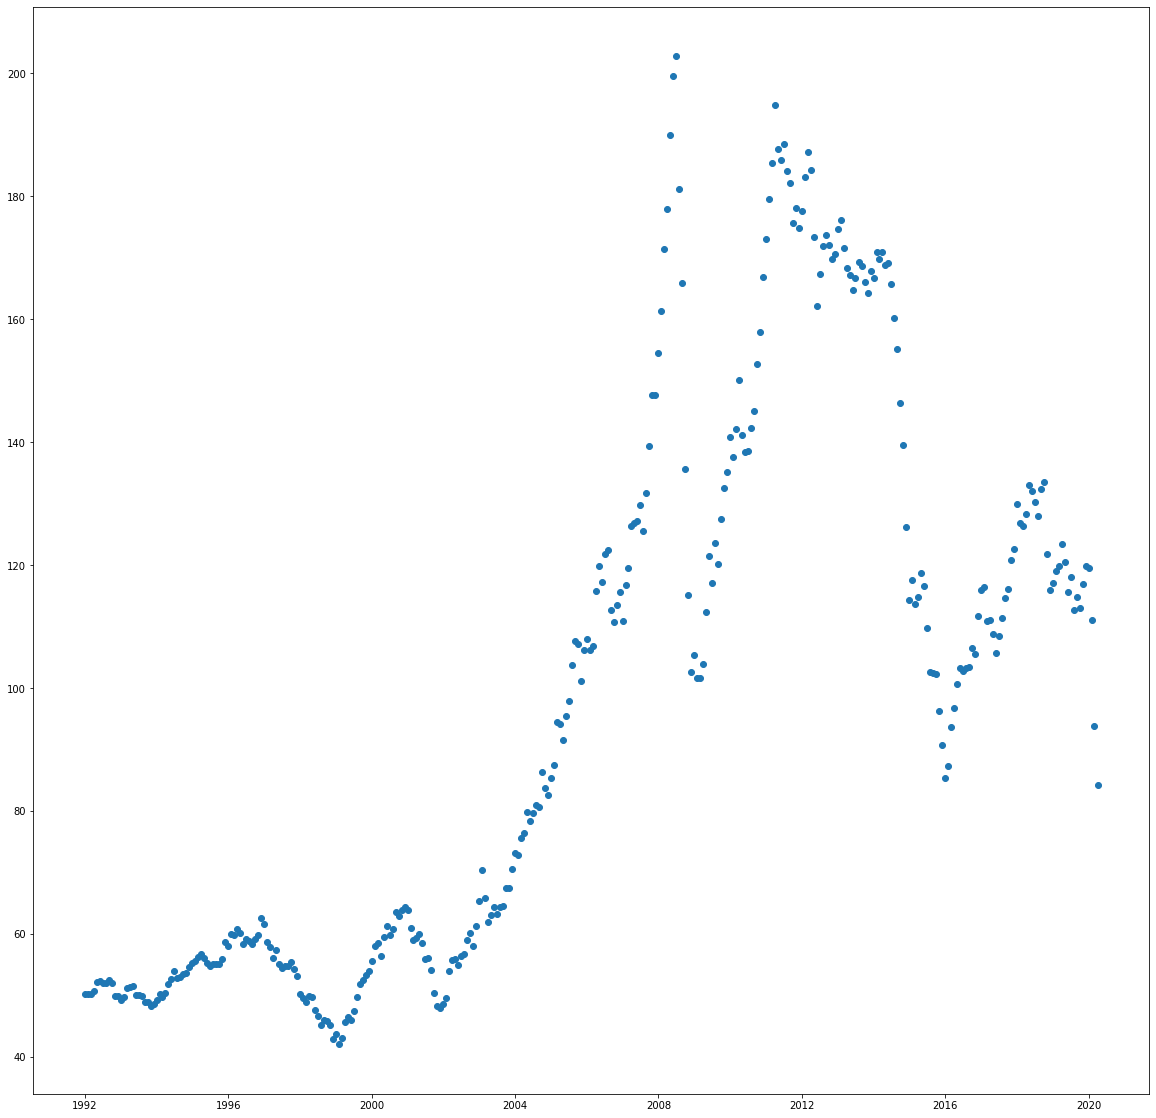

In [205]:
plt.figure(figsize=(20,20))
plt.scatter(time,x)

In [206]:
data['Commodity']=time

In [207]:
data

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,...,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE
3,1980-01-01,NaN,NaN,NaN,NaN,NaN,124.374,NaN,NaN,69.4661,...,NaN,806.786,NaN,150,100,261.316,NaN,NaN,NaN,NaN
4,1980-02-01,NaN,NaN,NaN,NaN,NaN,124.357,NaN,NaN,72.6044,...,NaN,882.315,NaN,160.714,115,258.095,NaN,NaN,NaN,NaN
5,1980-03-01,NaN,NaN,NaN,NaN,NaN,129.212,NaN,NaN,68.529,...,NaN,746.544,NaN,165,115,259.857,NaN,NaN,NaN,NaN
6,1980-04-01,NaN,NaN,NaN,NaN,NaN,124.304,NaN,NaN,67.0936,...,NaN,589.06,NaN,169.091,112.5,248.091,NaN,NaN,NaN,NaN
7,1980-05-01,NaN,NaN,NaN,NaN,NaN,127.143,NaN,NaN,66.9283,...,NaN,559.65,NaN,170,117.5,211.364,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2019-12-01,119.913,120.102,111.302,102.777,103.731,91.4935,122.086,102.306,99.1206,...,1900.59,925.227,0.497905,215.045,265.5,271.136,3.45729,19.4764,63.7379,2.92972
483,2020-01-01,119.555,118.936,114.121,104.104,105.361,89.2416,124.488,103.857,102.189,...,2226.65,986.652,0.431048,220.826,245,279.348,3.66816,17.1156,63.0079,2.88133
484,2020-02-01,111.092,109.187,111.632,100.386,101.402,88.3807,118.774,100.412,100.588,...,2524.7,961.1,0.396632,241,245,300,3.64687,17.002,59.4497,2.77909
485,2020-03-01,93.8739,90.0671,107.832,96.9123,97.709,87.4954,113.228,96.7826,95.9059,...,2108.91,759,0.2925,264.273,245,312,3.64287,16.3573,56.5843,2.77604


In [208]:
temp=['Commodity','PALLFNF','PEXGALL','PFANDB','PFOOD','PBEVE','PAGRI','PRAWM','PFERT','POILAPSP','PCOFFOTM','PMAIZMT','PSUGAISA']
data[temp]

,Commodity,PALLFNF,PEXGALL,PFANDB,PFOOD,PBEVE,PAGRI,PRAWM,PFERT,POILAPSP,PCOFFOTM,PMAIZMT,PSUGAISA
3,1980-01-01,NaN,NaN,NaN,NaN,124.374,NaN,69.4661,62.5066,NaN,168.67,105.507,17.3
4,1980-02-01,NaN,NaN,NaN,NaN,124.357,NaN,72.6044,66.4321,NaN,164.83,114.168,22.75
5,1980-03-01,NaN,NaN,NaN,NaN,129.212,NaN,68.529,67.4789,NaN,184.38,109.837,19.63
6,1980-04-01,NaN,NaN,NaN,NaN,124.304,NaN,67.0936,67.2525,NaN,180.81,108.263,21.25
7,1980-05-01,NaN,NaN,NaN,NaN,127.143,NaN,66.9283,65.5452,NaN,190.54,109.837,30.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2019-12-01,119.913,120.102,102.777,103.731,91.4935,102.306,99.1206,97.433,149.215,164.44,167.059,13.3352
483,2020-01-01,119.555,118.936,104.104,105.361,89.2416,103.857,102.189,96.7425,145.136,150.357,171.814,14.1667
484,2020-02-01,111.092,109.187,100.386,101.402,88.3807,100.412,100.588,102.516,126.529,145.861,168.745,15.0711
485,2020-03-01,93.8739,90.0671,96.9123,97.709,87.4954,96.7826,95.9059,108.367,76.2197,161.463,162.179,11.805


In [224]:
temp=['Commodity','PALLFNF','PEXGALL','PFANDB','PFOOD','PBEVE','PAGRI','PRAWM','PFERT','POILAPSP','PCOFFOTM','PMAIZMT','PSUGAISA']
x_final=data[temp].dropna()

In [225]:
x_final

,Commodity,PALLFNF,PEXGALL,PFANDB,PFOOD,PBEVE,PAGRI,PRAWM,PFERT,POILAPSP,PCOFFOTM,PMAIZMT,PSUGAISA
147,1992-01-01,50.254,52.7248,64.4626,65.8159,48.4677,64.8154,67.2018,53.415,40.2254,72.9904,109.586,8.42409
148,1992-02-01,50.2474,52.7258,64.6729,66.4117,44.1216,65.1275,68.2029,53.1332,41.0897,67.8821,113.921,7.843
149,1992-03-01,50.2735,52.8418,65.5112,67.3307,44.0065,65.9055,68.5731,52.6322,41.1653,70.1433,116.685,8.25045
150,1992-04-01,50.6892,53.3544,62.7831,64.4593,42.9725,64.0357,72.5089,54.1129,44.0876,65.43,109.055,9.45572
151,1992-05-01,52.1349,54.978,64.732,66.7485,40.8988,65.7033,72.2737,56.5358,45.5662,60.257,109.178,9.61333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2019-12-01,119.913,120.102,102.777,103.731,91.4935,102.306,99.1206,97.433,149.215,164.44,167.059,13.3352
483,2020-01-01,119.555,118.936,104.104,105.361,89.2416,103.857,102.189,96.7425,145.136,150.357,171.814,14.1667
484,2020-02-01,111.092,109.187,100.386,101.402,88.3807,100.412,100.588,102.516,126.529,145.861,168.745,15.0711
485,2020-03-01,93.8739,90.0671,96.9123,97.709,87.4954,96.7826,95.9059,108.367,76.2197,161.463,162.179,11.805


In [226]:
x_final.to_csv('price_index.csv')